In [1]:
import sys
sys.path.append('..')

In [2]:
from scratch.linear_algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

In [3]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

In [4]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

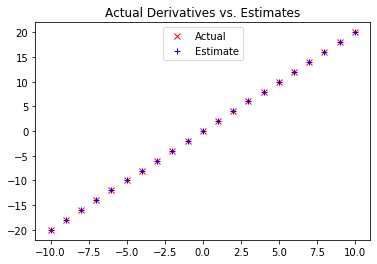

In [5]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9);

# plt.show()

In [6]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

In [7]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

In [8]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

0 [9.041515026264983, -0.17776694816904112, 0.13051322618277716]
1 [8.860684725739684, -0.1742116092056603, 0.12790296165912163]
2 [8.68347103122489, -0.1707273770215471, 0.1253449024259392]
3 [8.509801610600393, -0.16731282948111617, 0.12283800437742043]
4 [8.339605578388385, -0.16396657289149386, 0.12038124428987201]
5 [8.172813466820617, -0.16068724143366397, 0.11797361940407457]
6 [8.009357197484205, -0.1574734966049907, 0.11561414701599308]
7 [7.849170053534521, -0.15432402667289088, 0.11330186407567322]
8 [7.69218665246383, -0.15123754613943308, 0.11103582679415976]
9 [7.5383429194145535, -0.1482127952166444, 0.10881511025827656]
10 [7.387576061026262, -0.14524853931231152, 0.10663880805311103]
11 [7.2398245398057375, -0.14234356852606528, 0.10450603189204881]
12 [7.095028049009623, -0.13949669715554397, 0.10241591125420783]
13 [6.9531274880294305, -0.13670676321243308, 0.10036759302912368]
14 [6.814064938268842, -0.13397262794818443, 0.09836024116854121]
15 [6.677783639503465, -

973 [2.625505045358293e-08, -5.162055451547118e-10, 3.789886239567781e-10]
974 [2.572994944451127e-08, -5.058814342516175e-10, 3.714088514776425e-10]
975 [2.5215350455621044e-08, -4.957638055665852e-10, 3.6398067444808966e-10]
976 [2.4711043446508623e-08, -4.858485294552535e-10, 3.5670106095912785e-10]
977 [2.421682257757845e-08, -4.761315588661484e-10, 3.495670397399453e-10]
978 [2.3732486126026882e-08, -4.666089276888254e-10, 3.425756989451464e-10]
979 [2.3257836403506346e-08, -4.572767491350489e-10, 3.3572418496624347e-10]
980 [2.279267967543622e-08, -4.481312141523479e-10, 3.290097012669186e-10]
981 [2.2336826081927496e-08, -4.39168589869301e-10, 3.224295072415802e-10]
982 [2.1890089560288946e-08, -4.3038521807191495e-10, 3.159809170967486e-10]
983 [2.1452287769083167e-08, -4.2177751371047667e-10, 3.0966129875481364e-10]
984 [2.1023242013701502e-08, -4.133419634362671e-10, 3.0346807277971736e-10]
985 [2.0602777173427472e-08, -4.050751241675418e-10, 2.9739871132412303e-10]
986 [2.01

In [9]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

In [10]:
from scratch.linear_algebra import vector_mean

# Start with random values for slope and intercept.
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.39480386051534, 0.9410518807116608]
1 [11.061606876916972, 0.9625645808107527]
2 [25.957870777677194, 0.9617010585260481]
3 [16.022061892347836, 0.9757355271866731]
4 [22.649260453331184, 0.9798061180246476]
5 [18.228923083746125, 0.9904957662419294]
6 [21.177298798907575, 0.9967436977931916]
7 [19.21073844482644, 1.005927509196513]
8 [20.52244338480996, 1.0131263926229463]
9 [19.64754338872438, 1.0216225832225105]
10 [20.23111018230406, 1.0292268814447898]
11 [19.841878735284634, 1.0373995378642042]
12 [20.10150428310301, 1.0451666175237604]
13 [19.928341809787813, 1.0531777885718159]
14 [20.0438491906601, 1.06099977480446]
15 [19.966813589604516, 1.068921624445511]
16 [20.01820425735823, 1.0767505947862246]
17 [19.983934510936844, 1.0846152978540105]
18 [20.00680029650298, 1.0924300017692392]
19 [19.991556632234282, 1.1002519420622037]
20 [20.001731978241796, 1.1080429948103137]
21 [19.99495281350753, 1.1158286407989348]
22 [19.999482302031275, 1.1235919363308446]
23 [19.996468

691 [19.999389730109684, 3.98390026609534]
692 [19.999390950282937, 3.985931855293259]
693 [19.999392168016573, 3.9879593825329556]
694 [19.99939338331548, 3.989982855935906]
695 [19.999394596184512, 3.99200228360735]
696 [19.999395806628538, 3.9940176736363195]
697 [19.999397014652402, 3.9960290340956752]
698 [19.999398220260943, 3.998036373042136]
699 [19.999399423458993, 4.0000396985163125]
700 [19.99940062425137, 4.002039018542739]
701 [19.99940182264288, 4.004034341129905]
702 [19.99940301863833, 4.006025674270288]
703 [19.999404212242506, 4.008013025940386]
704 [19.999405403460187, 4.009996404100748]
705 [19.999406592296157, 4.0119758166960064]
706 [19.99940777875516, 4.013951271654911]
707 [19.99940896284196, 4.015922776890356]
708 [19.999410144561303, 4.0178903402994175]
709 [19.99941132391791, 4.01985396976338]
710 [19.999412500916517, 4.021813673147771]
711 [19.999413675561833, 4.023769458302392]
712 [19.99941484785856, 4.025721333061349]
713 [19.999416017811402, 4.0276693052

967 [19.9996487442245, 4.415158922835139]
968 [19.999649446525094, 4.416328253733693]
969 [19.999650147421494, 4.41749524667275]
970 [19.999650846916534, 4.418659906326827]
971 [19.999651545013, 4.41982223736109]
972 [19.99965224171369, 4.42098224443138]
973 [19.9996529370214, 4.422139932184232]
974 [19.999653630938912, 4.423295305256884]
975 [19.999654323469002, 4.424448368277309]
976 [19.999655014614454, 4.425599125864223]
977 [19.99965570437802, 4.426747582627109]
978 [19.999656392762486, 4.427893743166233]
979 [19.99965707977059, 4.429037612072663]
980 [19.99965776540509, 4.430179193928288]
981 [19.999658449668733, 4.431318493305837]
982 [19.99965913256426, 4.432455514768894]
983 [19.999659814094407, 4.43359026287192]
984 [19.999660494261903, 4.434722742160271]
985 [19.99966117306947, 4.435852957170212]
986 [19.999661850519836, 4.436980912428941]
987 [19.999662526615698, 4.438106612454604]
988 [19.999663201359784, 4.4392300617563105]
989 [19.99966387475478, 4.440351264834158]
990 [

1717 [19.999921706544818, 4.8696413500998865]
1718 [19.999921863084705, 4.869901989106231]
1719 [19.999922019311608, 4.870162106991104]
1720 [19.99992217522615, 4.870421704796433]
1721 [19.999922330828955, 4.870680783562066]
1722 [19.99992248612065, 4.8709393443257705]
1723 [19.999922641101854, 4.87119738812324]
1724 [19.999922795773188, 4.871454915988095]
1725 [19.99992295013527, 4.871711928951892]
1726 [19.999923104188724, 4.8719684280441236]
1727 [19.999923257934164, 4.872224414292224]
1728 [19.999923411372205, 4.872479888721574]
1729 [19.99992356450346, 4.872734852355503]
1730 [19.999923717328546, 4.872989306215295]
1731 [19.999923869848075, 4.8732432513201935]
1732 [19.999924022062654, 4.873496688687402]
1733 [19.999924173972897, 4.87374961933209]
1734 [19.99992432557941, 4.874002044267399]
1735 [19.9999244768828, 4.874253964504443]
1736 [19.999924627883676, 4.874505381052317]
1737 [19.999924778582642, 4.874756294918096]
1738 [19.999924928980295, 4.875006707106842]
1739 [19.999925

2674 [19.999988468027635, 4.9807992590847485]
2675 [19.999988491084654, 4.980837649034607]
2676 [19.99998851409557, 4.980875962227622]
2677 [19.99998853706048, 4.9809141988172625]
2678 [19.999988559979474, 4.980952358956689]
2679 [19.999988582852648, 4.980990442798754]
2680 [19.999988605680084, 4.98102845049601]
2681 [19.99998862846188, 4.981066382200698]
2682 [19.999988651198127, 4.981104238064758]
2683 [19.999988673888915, 4.981142018239827]
2684 [19.999988696534334, 4.981179722877236]
2685 [19.999988719134475, 4.9812173521280165]
2686 [19.99998874168943, 4.981254906142895]
2687 [19.99998876419929, 4.981292385072298]
2688 [19.999988786664144, 4.981329789066353]
2689 [19.999988809084083, 4.981367118274885]
2690 [19.99998883145919, 4.981404372847419]
2691 [19.999988853789567, 4.981441552933183]
2692 [19.999988876075292, 4.981478658681106]
2693 [19.99998889831646, 4.981515690239819]
2694 [19.99998892051316, 4.981552647757656]
2695 [19.999988942665478, 4.981589531382654]
2696 [19.9999889

3417 [19.999997393306554, 4.995659853846147]
3418 [19.999997398518374, 4.995668531531762]
3419 [19.999997403719775, 4.995677191867217]
3420 [19.999997408910776, 4.995685834887202]
3421 [19.9999974140914, 4.995694460626338]
3422 [19.999997419261664, 4.995703069119177]
3423 [19.99999742442159, 4.9957116604002]
3424 [19.9999974295712, 4.995720234503821]
3425 [19.999997434710515, 4.995728791464384]
3426 [19.99999743983955, 4.995737331316167]
3427 [19.999997444958336, 4.995745854093374]
3428 [19.999997450066882, 4.995754359830146]
3429 [19.99999745516522, 4.9957628485605525]
3430 [19.999997460253358, 4.995771320318597]
3431 [19.99999746533133, 4.995779775138213]
3432 [19.99999747039914, 4.995788213053268]
3433 [19.999997475456826, 4.995796634097561]
3434 [19.999997480504394, 4.995805038304822]
3435 [19.999997485541872, 4.995813425708717]
3436 [19.99999749056928, 4.995821796342842]
3437 [19.99999749558663, 4.995830150240725]
3438 [19.99999750059396, 4.99583848743583]
3439 [19.999997505591264

3802 [19.999998793717634, 4.997991539135264]
3803 [19.999998796129475, 4.997995554850712]
3804 [19.99999879853649, 4.99799956253714]
3805 [19.999998800938698, 4.998003562210601]
3806 [19.999998803336098, 4.998007553887119]
3807 [19.99999880572871, 4.998011537582681]
3808 [19.999998808116533, 4.998015513313244]
3809 [19.999998810499584, 4.998019481094734]
3810 [19.999998812877873, 4.998023440943044]
3811 [19.999998815251402, 4.998027392874036]
3812 [19.999998817620188, 4.998031336903539]
3813 [19.99999881998424, 4.9980352730473525]
3814 [19.99999882234356, 4.998039201321242]
3815 [19.999998824698167, 4.998043121740943]
3816 [19.999998827048064, 4.998047034322159]
3817 [19.999998829393263, 4.998050939080563]
3818 [19.999998831733773, 4.998054836031795]
3819 [19.999998834069604, 4.9980587251914645]
3820 [19.999998836400767, 4.998062606575151]
3821 [19.999998838727265, 4.998066480198402]
3822 [19.999998841049113, 4.998070346076732]
3823 [19.999998843366317, 4.998074204225627]
3824 [19.9999

4466 [19.99999968062425, 4.9994682391845675]
4467 [19.99999968126281, 4.999469302386823]
4468 [19.999999681900093, 4.9994703634633115]
4469 [19.999999682536103, 4.999471422418285]
4470 [19.999999683170838, 4.999472479255984]
4471 [19.999999683804308, 4.999473533980643]
4472 [19.999999684436506, 4.999474586596486]
4473 [19.999999685067447, 4.99947563710773]
4474 [19.99999968569712, 4.999476685518582]
4475 [19.99999968632554, 4.999477731833242]
4476 [19.999999686952698, 4.999478776055901]
4477 [19.999999687578605, 4.999479818190742]
4478 [19.99999968820326, 4.999480858241939]
4479 [19.999999688826666, 4.999481896213658]
4480 [19.999999689448828, 4.999482932110058]
4481 [19.999999690069743, 4.999483965935287]
4482 [19.999999690689418, 4.999484997693486]
4483 [19.999999691307853, 4.999486027388788]
4484 [19.99999969192505, 4.999487055025319]
4485 [19.999999692541017, 4.999488080607193]
4486 [19.999999693155747, 4.99948910413852]
4487 [19.999999693769254, 4.999490125623399]
4488 [19.9999996

4909 [19.99999986840254, 4.9997808901484735]
4910 [19.999999868665654, 4.999781328236579]
4911 [19.999999868928246, 4.9997817654487715]
4912 [19.999999869190308, 4.999782201786802]
4913 [19.99999986945185, 4.999782637252419]
4914 [19.999999869712866, 4.999783071847365]
4915 [19.999999869973365, 4.999783505573383]
4916 [19.99999987023334, 4.99978393843221]
4917 [19.999999870492797, 4.999784370425579]
4918 [19.99999987075173, 4.99978480155522]
4919 [19.99999987101015, 4.9997852318228615]
4920 [19.999999871268052, 4.999785661230226]
4921 [19.99999987152544, 4.999786089779034]
4922 [19.99999987178231, 4.9997865174710014]
4923 [19.999999872038668, 4.999786944307842]
4924 [19.999999872294516, 4.999787370291265]
4925 [19.99999987254985, 4.999787795422977]
4926 [19.999999872804672, 4.999788219704681]
4927 [19.99999987305899, 4.999788643138076]
4928 [19.99999987331279, 4.999789065724858]
4929 [19.999999873566093, 4.999789487466721]
4930 [19.999999873818883, 4.999789908365353]
4931 [19.999999874

In [11]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]


theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.790553602675434, 0.9331340828587579]
1 [20.71614726178543, 1.0223540256429677]
2 [19.907058077050415, 1.231582845265493]
3 [19.438128640417546, 1.3106317077568688]
4 [20.116359801376515, 1.2979903858973691]
5 [20.73761894953371, 1.3314983266589842]
6 [20.22764582121173, 1.379548664773079]
7 [20.12947932017188, 1.582572842139126]
8 [19.8949721633128, 1.628282388833116]
9 [19.86052874265062, 1.7755309947251376]
10 [20.516585186528342, 1.8086328868711035]
11 [20.127485593642614, 1.8043012603753183]
12 [20.04443140377425, 1.8227331003558636]
13 [20.640525438119795, 1.8550652911149137]
14 [19.932959232883935, 2.036534601453815]
15 [20.077292322063293, 2.065967219046802]
16 [20.142375518961494, 2.0801099430994285]
17 [21.23012556838536, 2.162788753855192]
18 [20.00299614141948, 2.3368442150344504]
19 [19.998786714478808, 2.4554778607295296]
20 [20.005497927503402, 2.5705746793975797]
21 [20.394734391298186, 2.612938332880827]
22 [19.88984766675129, 2.624376995487827]
23 [20.08186979476

362 [20.000575102306026, 4.984506983499471]
363 [20.000763967902593, 4.984589154800696]
364 [19.99314688348799, 4.98497897728169]
365 [19.999497762557617, 4.98536940978559]
366 [20.000107874634505, 4.985461253807613]
367 [20.002747057089298, 4.985613230306679]
368 [19.99678388385422, 4.9858883902859805]
369 [20.00029697009581, 4.984887322839039]
370 [20.000666153169636, 4.984957683038743]
371 [19.999545285960917, 4.985168496640308]
372 [20.00053041306826, 4.985413385948502]
373 [19.999384160901247, 4.98544173497995]
374 [19.999467074965743, 4.985522057831032]
375 [19.993794478450738, 4.985931233257794]
376 [19.99905874922922, 4.988780552567204]
377 [19.999567351586236, 4.988794266232198]
378 [20.00001549024194, 4.988873820420328]
379 [19.998698548645645, 4.988992097591406]
380 [19.99946566349522, 4.988826148564431]
381 [20.002217739442997, 4.988962935673666]
382 [20.00016734674284, 4.9895486310569535]
383 [19.99952488201088, 4.989579808280886]
384 [19.998415438131055, 4.98983299104912]

712 [19.999967081144344, 4.999929198263748]
713 [20.00000893208331, 4.999925251112701]
714 [20.000005537326516, 4.999925352459751]
715 [19.9999960410856, 4.999925632251968]
716 [19.999990978457998, 4.999926287241859]
717 [20.000000125728967, 4.9999267723431835]
718 [20.000030646337798, 4.999928705541266]
719 [19.999994086283685, 4.999930482904686]
720 [20.00000072161254, 4.999931120839619]
721 [20.000011176205447, 4.99993239456282]
722 [20.00002894793565, 4.999934629768596]
723 [19.999991232180236, 4.9999314100035255]
724 [20.000012192118003, 4.999932482288334]
725 [19.999997967270367, 4.999935526485104]
726 [20.00000144236989, 4.999936171898311]
727 [20.00000107104954, 4.999936326494222]
728 [19.999997969469014, 4.9999370445945495]
729 [20.0000020292376, 4.9999381212493565]
730 [20.0000030317715, 4.9999384374281295]
731 [20.000003052386422, 4.999938823807107]
732 [19.999998200720434, 4.999939828681073]
733 [19.999997198689787, 4.999942556547473]
734 [19.999997095623925, 4.999942890394

In [12]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.11102937663258, -0.5261663298561492]
1 [20.10626512797225, -0.2890729865541035]
2 [20.10170596642989, -0.06215185276310086]
3 [20.09734238579633, 0.15503351048578198]
4 [20.093166016102806, 0.36290080385417467]
5 [20.089168859867208, 0.5618498082235969]
6 [20.085343167444197, 0.7522631517192788]
7 [20.08168163412901, 0.9345070462331327]
8 [20.078177181364467, 1.1089319920307887]
9 [20.074823088008998, 1.275873451269672]
10 [20.071612894215892, 1.4356524937269814]
11 [20.068540439438497, 1.588576414163406]
12 [20.065599781727702, 1.7349393228308496]
13 [20.062785305444816, 1.8750227116945344]
14 [20.06009159162694, 2.0090959963352133]
15 [20.057513421008306, 2.1374170324835147]
16 [20.055045884157753, 2.26023261315228]
17 [20.052684226795336, 2.377778943743522]
18 [20.050423852113507, 2.49028209429633]
19 [20.04826050398741, 2.597958436425039]
20 [20.046189924240434, 2.701015058295794]
21 [20.044208213639923, 2.7996501630838897]
22 [20.042311516357238, 2.894053450964958]
23 [20.04